In [1]:
import pyHalo
print(pyHalo.__path__)
from samana.forward_model_dual import forward_model
from samana.Data.wgdj0405 import WGDJ0405_JWST, WGDJ0405_HST
from samana.Model.wgdj0405_model import WGDJ0405ModelEPLM3M4Shear
import pyHalo
print(pyHalo.__path__)
import os
import numpy as np
import pickle

['/Users/ryankeeley/opt/anaconda3/envs/samana_env/lib/python3.10/site-packages/pyhalo-1.2.1-py3.10.egg/pyHalo']
['/Users/ryankeeley/opt/anaconda3/envs/samana_env/lib/python3.10/site-packages/pyhalo-1.2.1-py3.10.egg/pyHalo']


### Modeling of the lens system WGDJ 0405 with JWST flux ratio measurements presented by Nierenberg et al. (2023) and HST imaging data of the lensed arcs in 814W

In [6]:
data_class = WGDJ0405_JWST()
model = WGDJ0405ModelEPLM3M4Shear
preset_model_name = 'WDM'
kwargs_sample_realization = {'log10_sigma_sub': ['UNIFORM', -1.5, -1.49], 
                            'log_mc': ['UNIFORM', 4.0, 4.1]}

kwargs_sample_source = {'source_size_pc_1': ['UNIFORM', 1, 10],'source_size_pc_2': ['UNIFORM', 40, 80]}
kwargs_sample_macro_fixed = {
    'a4_a': ['GAUSSIAN', 0.0, 0.01], 
    'a3_a': ['GAUSSIAN', 0.0, 0.005],
    'delta_phi_m3': ['GAUSSIAN', -np.pi/6, np.pi/6],
    'delta_phi_m4': ['GAUSSIAN', -np.pi/8, np.pi/8]
}

output_path = os.getcwd() + '/example_model_0405/'
job_index = 1
n_keep = 2
tolerance = np.inf

reading output to files: 
/Users/ryankeeley/samana/notebooks/example_model_0405/job_1/parameters.txt
/Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes.txt
starting with 0 samples accepted, 2 remain
existing magnifications:  None
samples remaining:  2
running simulation with a summary statistic tolerance of:  inf
random seed:  2422243678
SOURCE PARAMETERS: 
{'source_size_pc_1': 7.148123182475029, 'source_size_pc_2': 48.685282604724705}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.49263977610196, 'log_mc': 4.029369936770625}
FIXED MACROMODEL SAMPLES: 
{'a4_a': -0.010789295363040994, 'a3_a': 0.00646022508079634, 'delta_phi_m3': 0.35916153839298914, 'delta_phi_m4': -0.2189079975001286}
realization has 2781 halos
setting up decoupled multi-plane approximation...
done.
running fitting sequence...
Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-1.1330241817131508 reduced X^2 of best position
-2212.229714794927 log likelihood
3905 effe

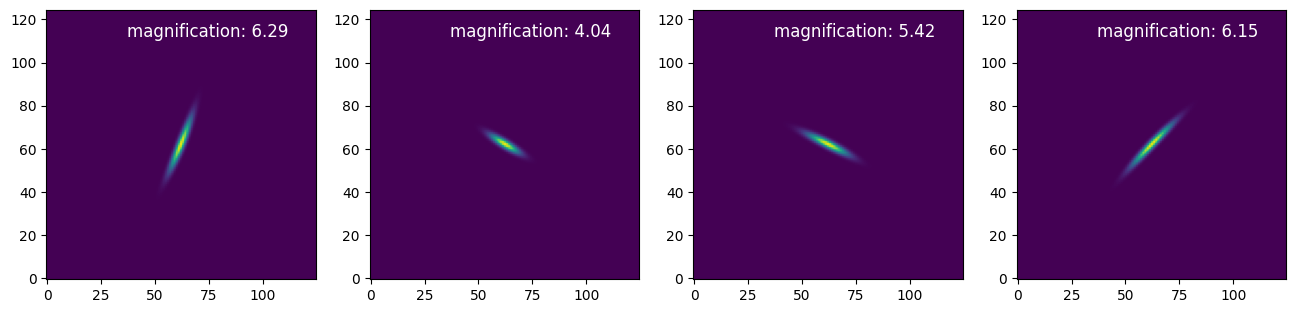

-1.1267312576214166 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1267312576214175


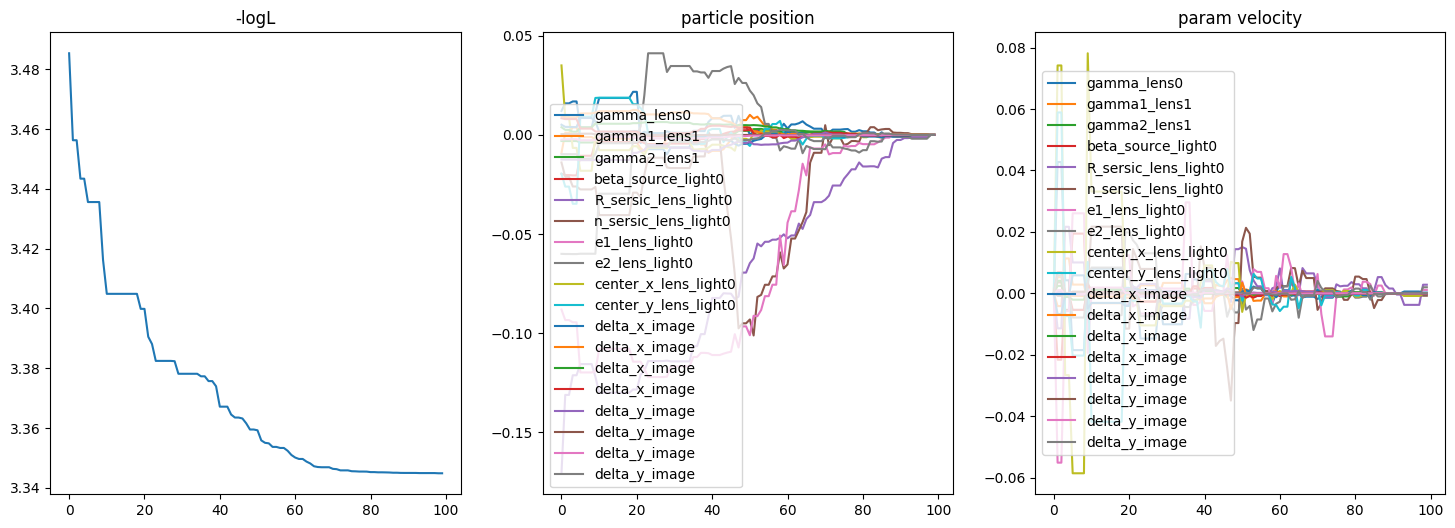

<Figure size 640x480 with 0 Axes>

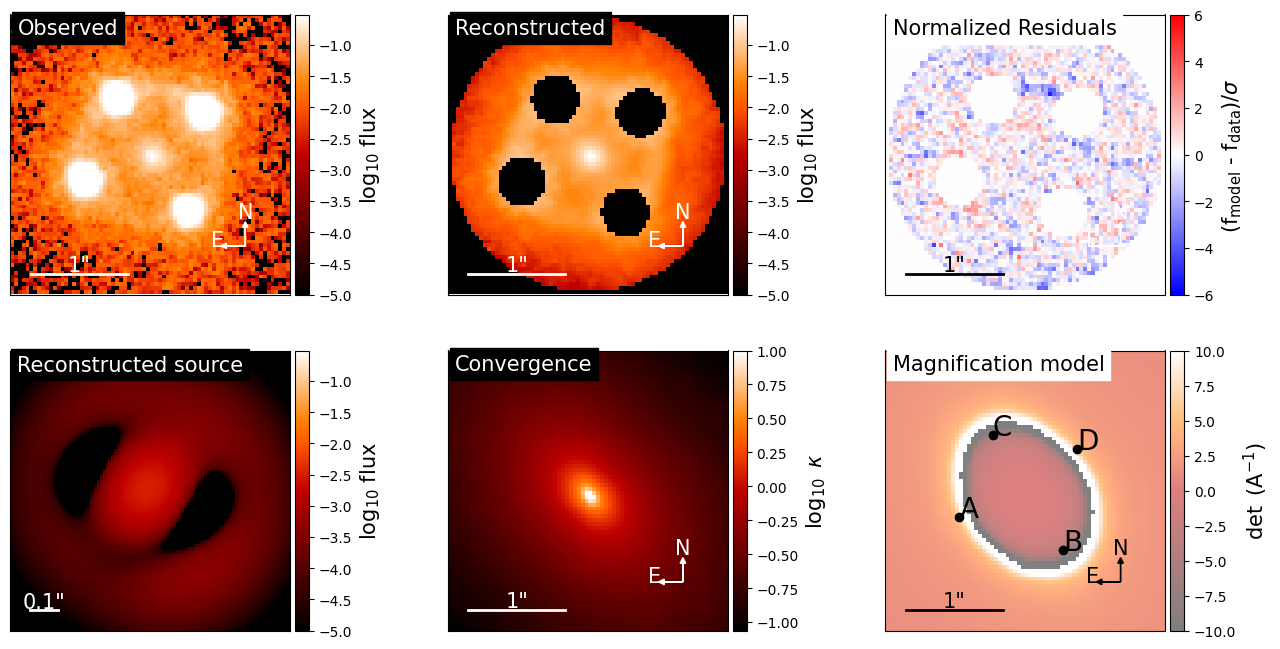

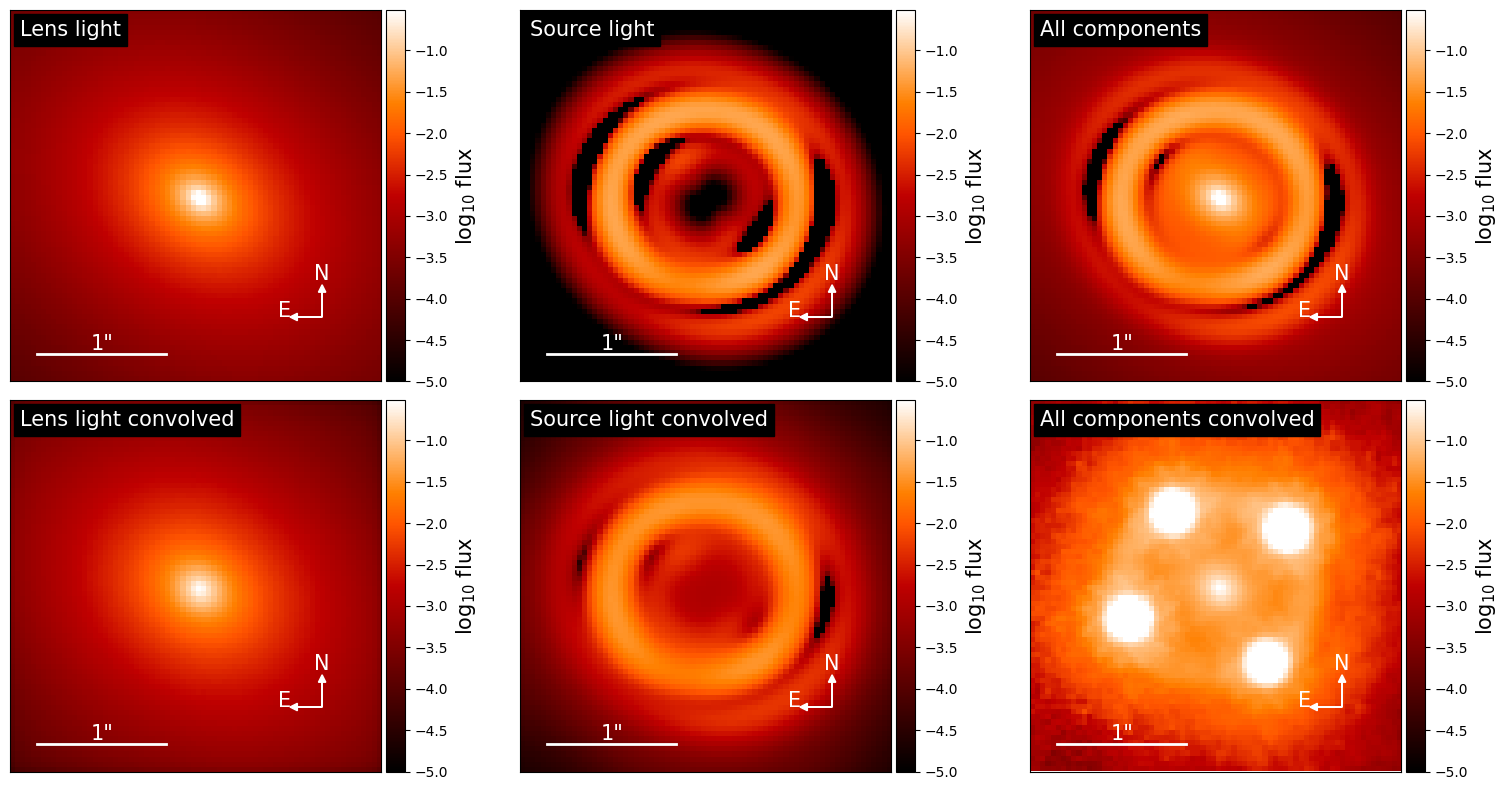

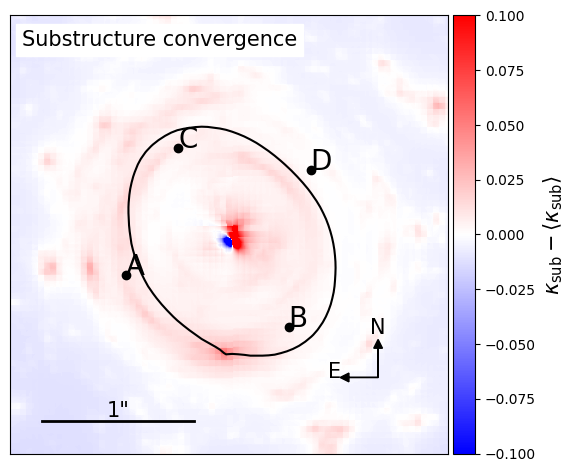

test
N_kept:  1
N remaining:  1
accepted realizations counter:  1
random seed:  2422243679
SOURCE PARAMETERS: 
{'source_size_pc_1': 6.218505528292235, 'source_size_pc_2': 56.54311181329265}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.4957246641215036, 'log_mc': 4.006027867331571}
FIXED MACROMODEL SAMPLES: 
{'a4_a': -0.014983818545179646, 'a3_a': -0.0017718138438983556, 'delta_phi_m3': -0.8058029070972833, 'delta_phi_m4': 0.06471804104600215}
realization has 2727 halos
setting up decoupled multi-plane approximation...
done.
running fitting sequence...
Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-1.167301224277197 reduced X^2 of best position
-2279.155640401227 log likelihood
3905 effective number of data points
[{'theta_E': 0.720177369502595, 'gamma': 2.13659522183371, 'e1': 0.14473810886192515, 'e2': 0.10825993766732948, 'center_x': 0.00993912714480839, 'center_y': -0.04998765510949824, 'a3_a': -0.0017718138438983556, 'delta_phi_m3': -0.805

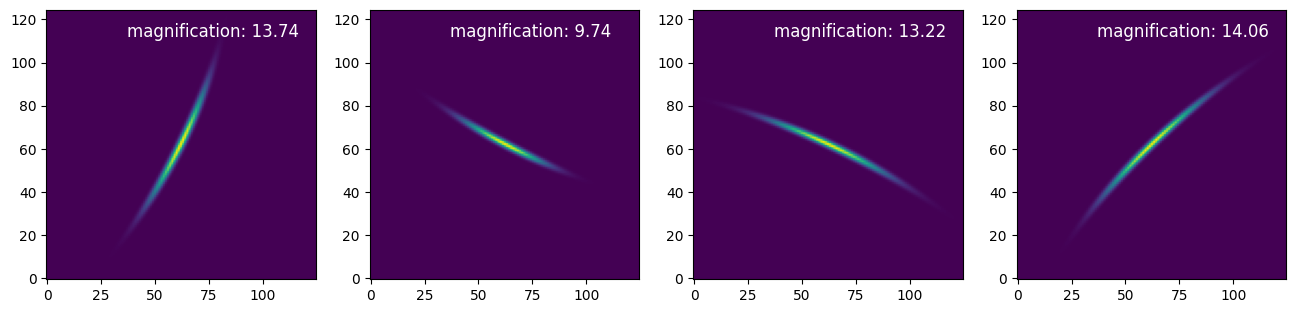

-1.131080270352147 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1310802703521465


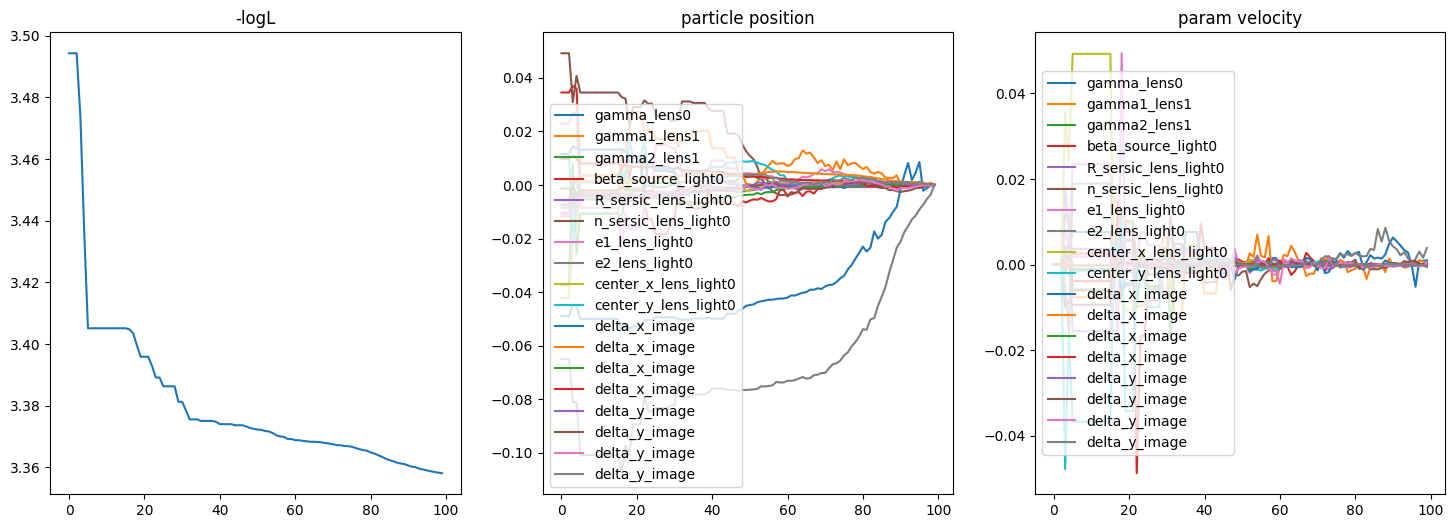

<Figure size 640x480 with 0 Axes>

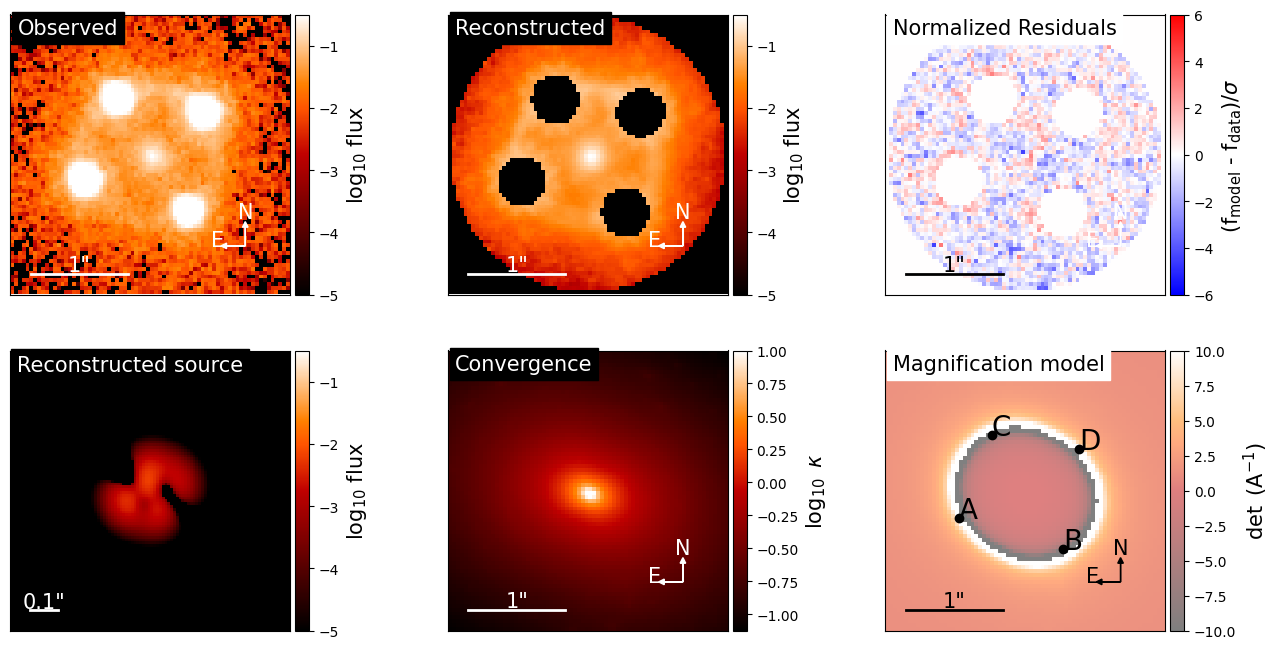

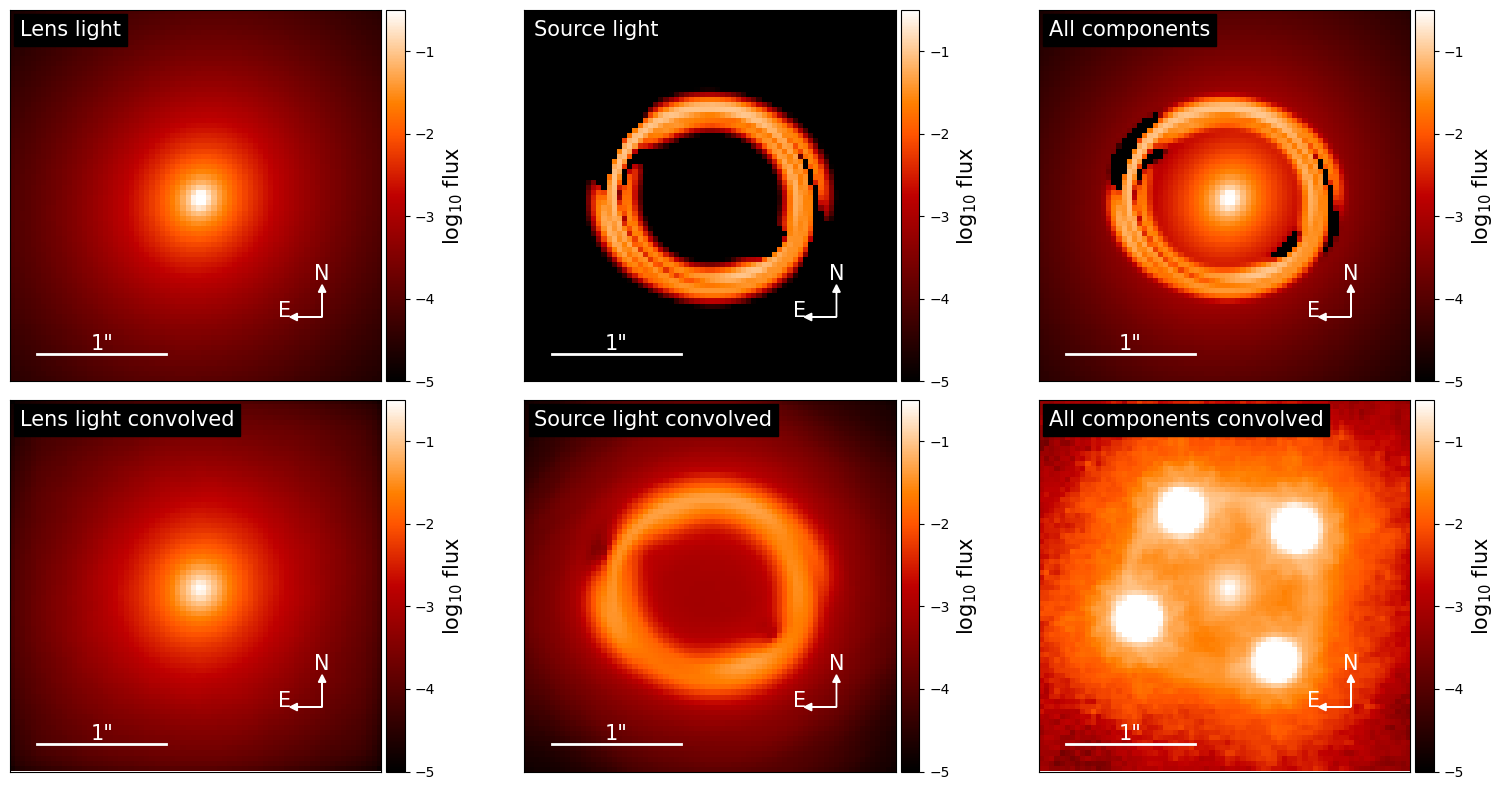

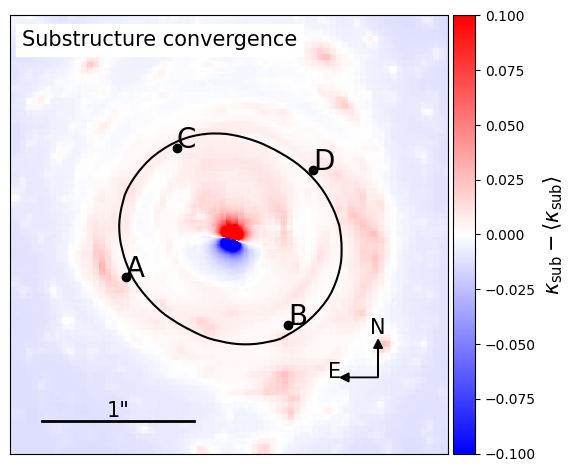

test
N_kept:  2
N remaining:  0
accepted realizations counter:  2
final data readout...
writing parameter output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/parameters.txt
writing flux ratio output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes.txt
writing macromodel samples to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/macromodel_samples.txt

SIMULATION FINISHED


In [7]:
job_index = 1
random_seed_init = None
n_pso_particles = 10
n_pso_iterations = 100
nmax_shapelets = 4
forward_model(output_path, job_index, n_keep, data_class, model, preset_model_name,
                  kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed, 
               tolerance, random_seed_init=random_seed_init, 
              verbose=True, n_pso_particles=n_pso_particles, 
              n_max_shapelets=nmax_shapelets,
              n_pso_iterations=n_pso_iterations, num_threads=8, 
              resample_kwargs_lens=False, use_imaging_data=True, test_mode=True)

In [ ]:
forward_model(output_path, job_index, n_keep, data_class, model, preset_model_name,
                  kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed,
               tolerance, random_seed_init=random_seed_init,
              rescale_grid_resolution=2.0,
              # rescale_grid_resolution=2 lowers the resolution of the ray-tracing grid, which makes the calcuation
              # faster without a significant loss of precision as far as I can tell
              verbose=verbose, n_pso_particles=n_pso_particles,
              n_pso_iterations=n_pso_iterations, num_threads=num_threads,
              test_mode=test_mode, use_imaging_data=use_imaging_data)